# Loader demos
Demos the loader functions and some related utility

In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('../')

In [3]:
from roc_bike_growth.loader import POI_graph_from_polygon, bike_infra_from_polygon, carall_from_polygon

In [4]:
rochester = ox.geocode_to_gdf('rochester, ny').geometry[0]

## POIs as their own network

In [5]:
POIs = POI_graph_from_polygon(rochester)

In [6]:
# Query attributes of the POIs
POIs.nodes('shop')

NodeDataView({270109894: None, 357544970: None, 357546761: None, 357548075: None, 357549099: None, 357549409: None, 357553465: None, 357554477: None, 357554690: None, 357554806: None, 357555355: None, 357556103: None, 357557908: None, 357564494: None, 357564553: None, 357564962: None, 357565087: None, 357565205: None, 357565395: None, 357566060: None, 357566304: None, 357567663: None, 357568097: None, 357568511: None, 357569111: None, 357571888: None, 357572347: None, 357572922: None, 357572931: None, 357575717: None, 357575766: None, 357575782: None, 357576812: None, 357582521: None, 357583617: None, 357583672: None, 357583769: None, 357583876: None, 357583923: None, 357584009: None, 357584029: None, 357584115: None, 357584534: None, 357584667: None, 357584792: None, 357585217: None, 357585445: None, 357587174: None, 357587431: None, 357587493: None, 357587567: None, 357599873: None, 357600506: None, 357600889: None, 357600899: None, 357600905: None, 357600917: None, 357600929: None, 

## Bike infra network

In [7]:
bike_infra = bike_infra_from_polygon(rochester)

No OSM data for bike_designatedpath
No OSM data for bike_cyclewayrighttrack
No OSM data for bike_cyclewaylefttrack
No OSM data for bike_cyclestreet
No OSM data for bike_bicycleroad
No OSM data for bike_livingstreet


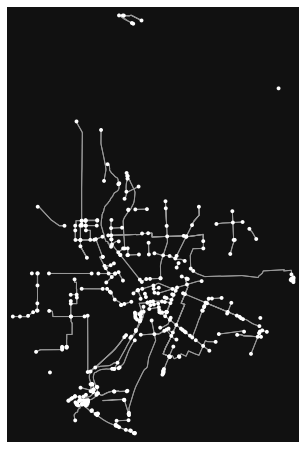

In [8]:
fig, ax = ox.plot.plot_graph(bike_infra)

## All driveable infra network (with POIs)

In [9]:
carall = carall_from_polygon(rochester, add_pois=True)

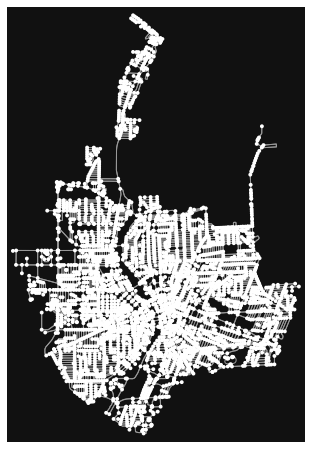

In [10]:
fig, ax = ox.plot.plot_graph(carall)

In [11]:
# Get list of POIs
pois = nx.get_node_attributes(carall, 'poi').keys()

In [12]:
# Plot POIs on graph
x, y = [], []
for node in pois:
    d = carall.nodes()[node]
    x.append(d['x'])
    y.append(d['y'])

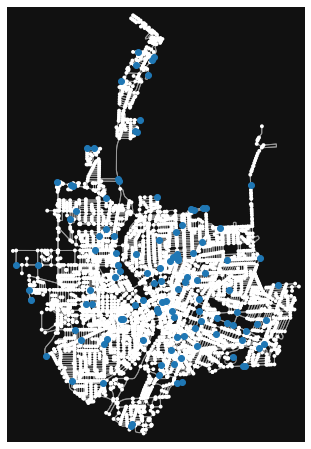

In [13]:
ax.scatter(x,y)
fig